In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
data = pd.read_csv('서울시 코로나19 확진자 현황.csv')
location = pd.read_csv('서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')
loc = pd.DataFrame(location, columns=['시군구명_한글', '위도', '경도'])
loc

,시군구명_한글,위도,경도
0,도봉구,37.665861,127.031767
1,은평구,37.617612,126.922700
2,동대문구,37.583801,127.050700
3,동작구,37.496504,126.944307
4,금천구,37.460097,126.900155
5,구로구,37.495486,126.858121
6,종로구,37.599100,126.986149
7,강북구,37.646995,127.014716
8,중랑구,37.595379,127.093967
9,강남구,37.495985,127.066409


In [3]:
''' 위도37도 33' 06.6" 경도126도 59' 19.6'''
center_lat = 37 + ((6.6/60) + 33) / 60
center_lon = 126 + ((19.6/60) + 59)/60
print(center_lat, center_lon)

37.551833333333335 126.98877777777778


In [4]:
# df = pd.DataFrame(data, columns=['연번','확진일','지역','노출여부'])
df = pd.DataFrame(data)
df = df.replace({'지역':'종랑구'}, '중랑구')
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,5,1.31.,9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5744,4,1.30.,7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5745,3,1.30.,6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5746,2,1.30.,5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot: >

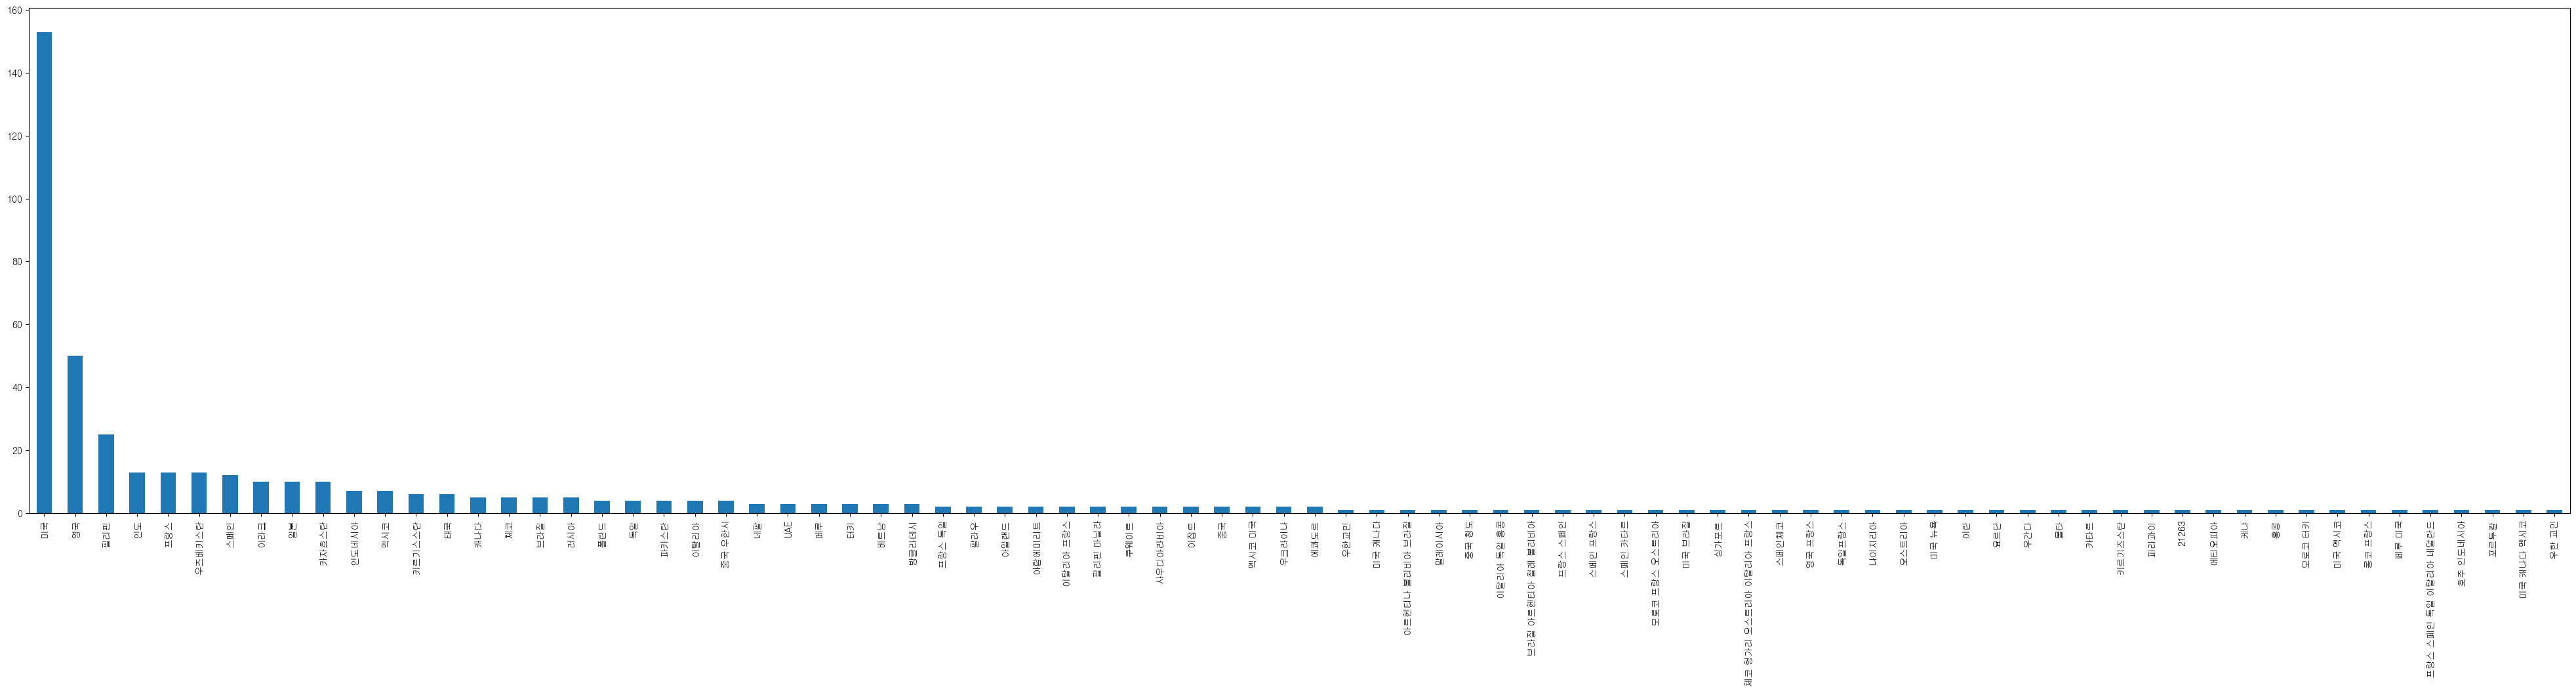

In [6]:
trip = df['여행력'].dropna()
trip.value_counts().plot(kind='bar', figsize=(50,10))

<AxesSubplot: >

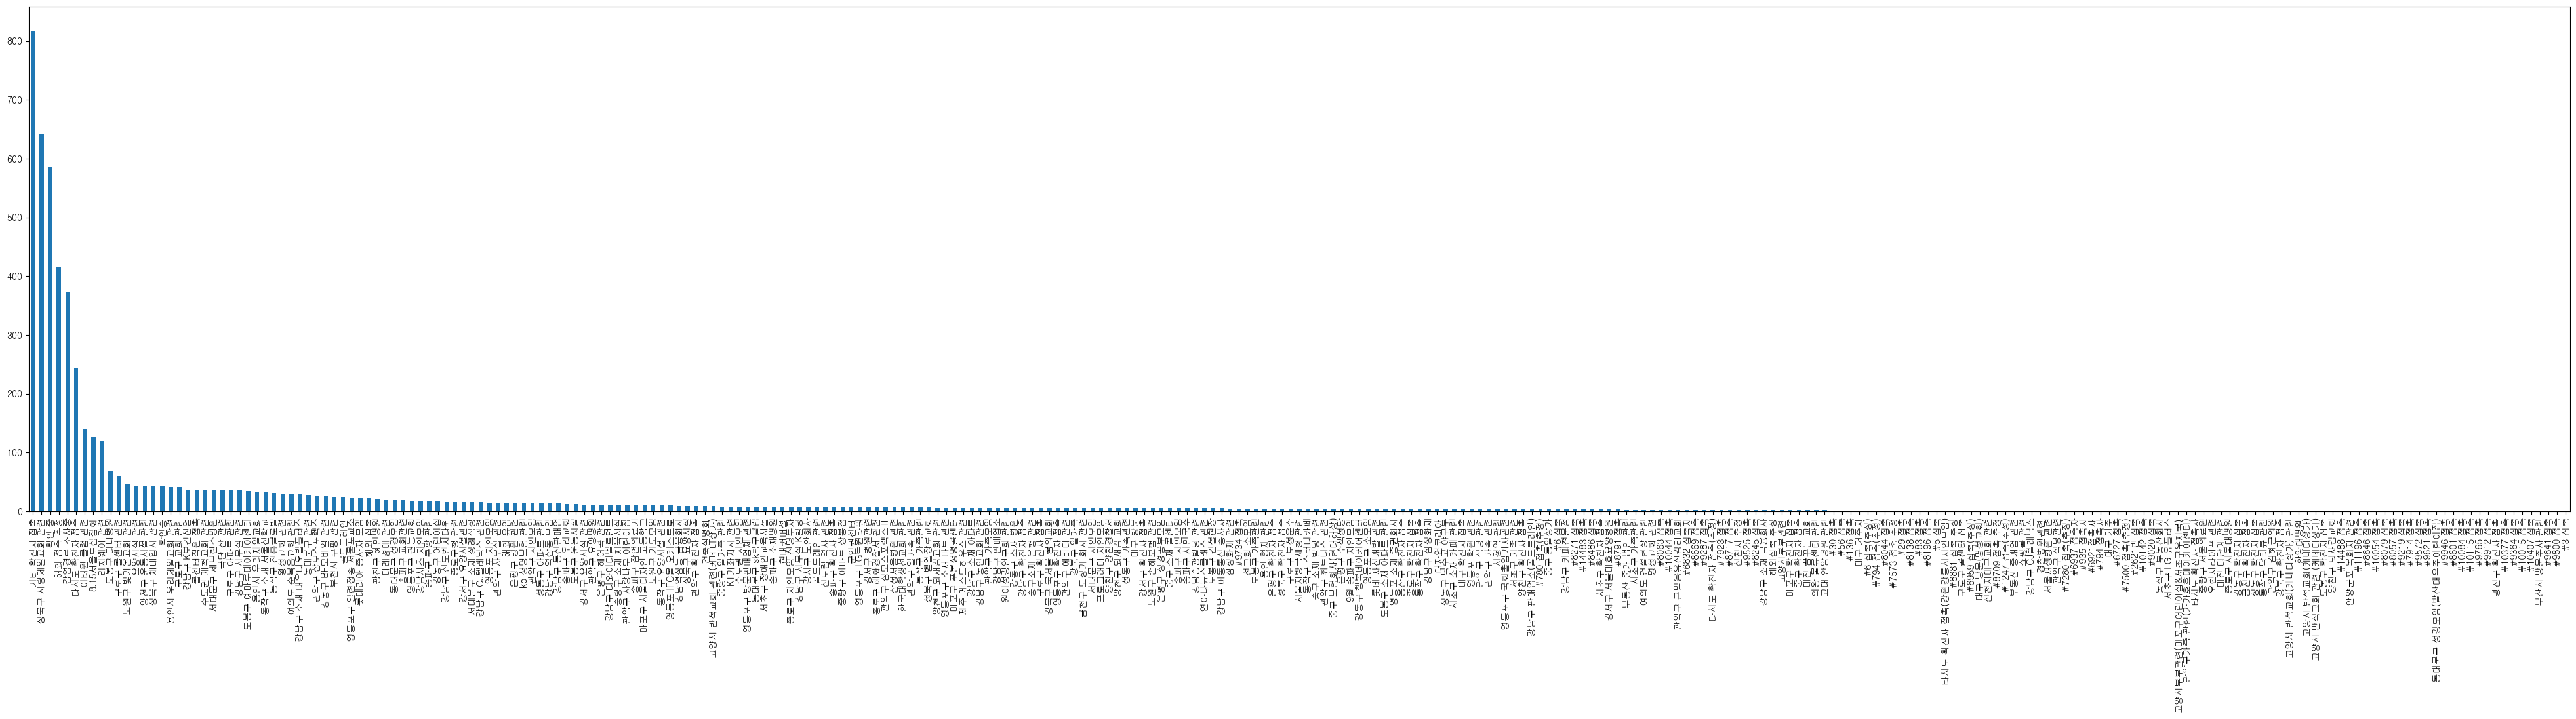

In [7]:
contact = df['접촉력'].dropna()
contact.value_counts().plot(kind='bar', figsize=(50,10))

In [8]:
news_202001 = pd.read_csv('코로나 (2019.12.01-2020.01.31).csv',encoding='cp949')
news_202002 = pd.read_csv('코로나 (2020.02.01-2020.02.29).csv',encoding='ANSI')
news_202003 = pd.read_csv('코로나 (2020.03.01-2020.03.31).csv',encoding='CP949')
news_202008 = pd.read_csv('코로나 (2020.08.01-2020.08.31).csv',encoding='CP949')
news_202009 = pd.read_csv('코로나 (2020.09.01-2020.09.30).csv',encoding='UTF-8')


C:\Users\Chaddol\AppData\Local\Temp\ipykernel_7744\3877343289.py:2: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  news_202002 = pd.read_csv('코로나 (2020.02.01-2020.02.29).csv',encoding='ANSI')


In [9]:
news = pd.concat([news_202008,news_202009])

In [10]:
news = pd.DataFrame(news)

In [11]:
keyward = news['키워드'].dropna()

In [12]:
infection = keyward.str.contains('감염|집단')

In [13]:
infection

0         False
1         False
2          True
3         False
4         False
          ...  
114331    False
114332    False
114333    False
114334     True
114335     True
Name: 키워드, Length: 220425, dtype: bool

In [14]:
infection = keyward[infection]


In [15]:
infection_keywards = infection.str.split(',').apply(lambda x: pd.Series(x))

In [16]:
i_keys_0809 = infection_keywards

<AxesSubplot: >

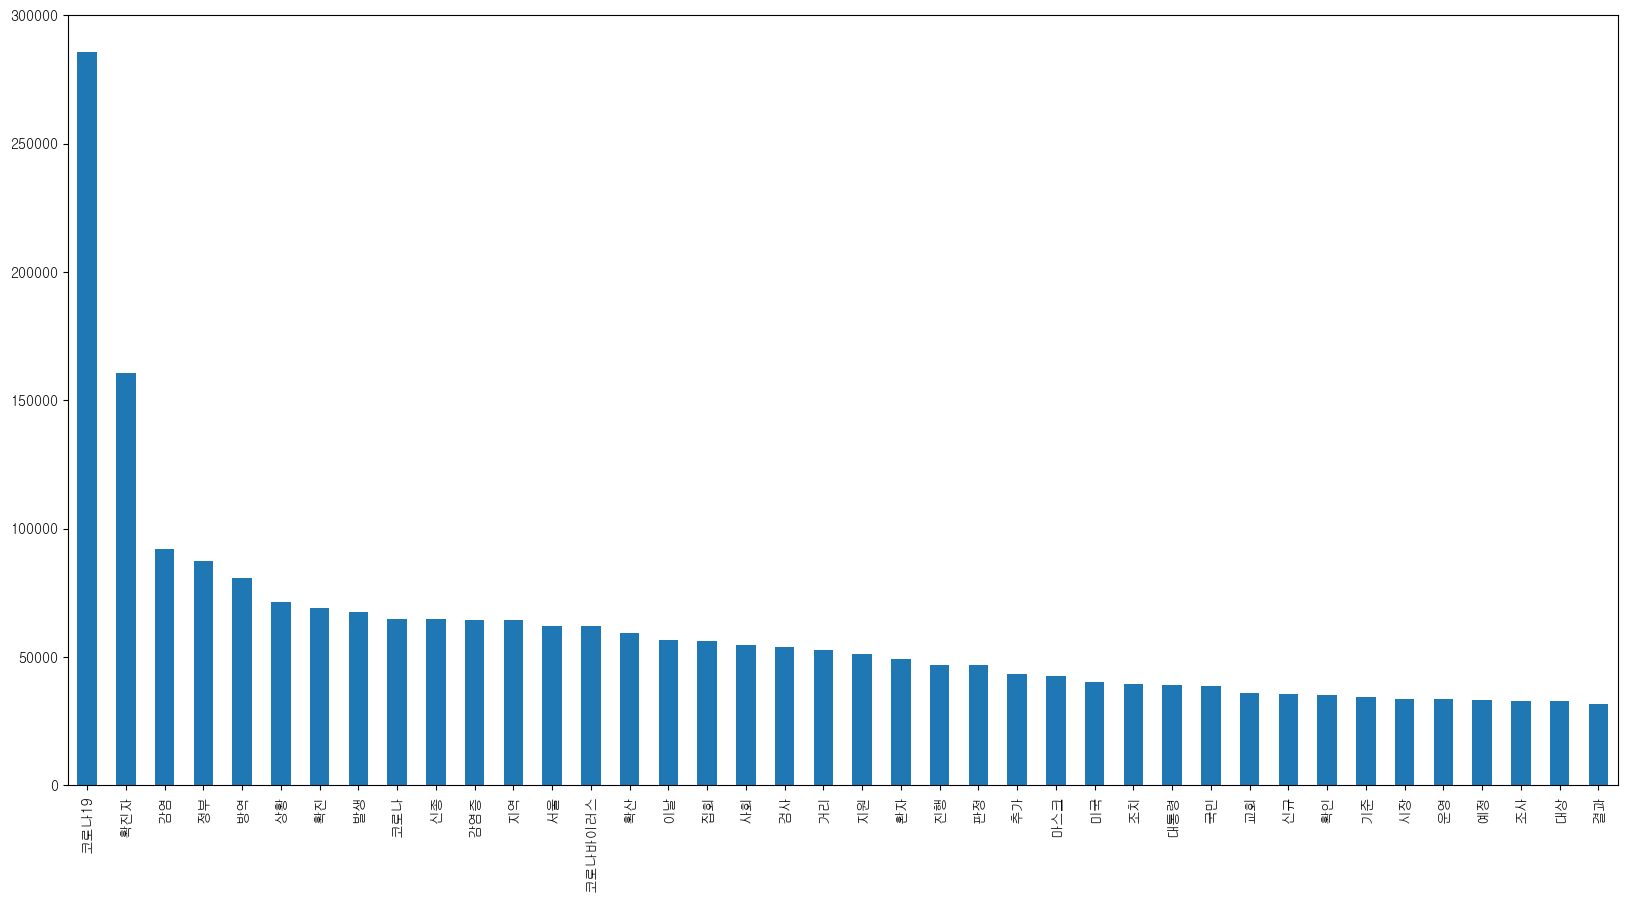

In [17]:
i_keys_0809.stack().value_counts().head(40).plot(kind='bar', figsize=(20,10))

In [18]:
i_keys_010203 = pd.concat([news_202001,news_202002,news_202003])

In [19]:
i_keys_010203 = i_keys_010203['키워드']

In [20]:
i_keys_010203 = i_keys_010203.dropna()
i_keys_010203

0         얼굴,2010년대,10개,태양,2010년대,마지막,시작,12월,마감,12월,10년,...
1         인류,멸종,재앙,종류,기후변화,자연재해,규모,지구,영향,정도,규모,재앙,장담,현실,...
2         숙행,미스트롯,콘서트,애간장,라이브,흥폭발,댄스,트로트,가수,숙행,미스트롯,콘서트,...
3         음악콩쿠르,세계일보,음악,콩쿠르,본선,피아노,4개,지정곡,확정,정상,음악,영재,등용...
4         영종,국제도시,월드,뮤직,경연,대회,개최,1월,예선랠리,참가접수,3월,예선,예선랠리...
                                ...                        
184083    정치,거리,낙하산,총선,6개월,대구,대표,미래,통합,황교안,모습,인재들,선거구,배치...
184084    원격수업,구청,지원,코로나19,장기,고등학교,개학,지연,아동,청소년들,이용,각종,시...
184085    국제유,추락,정유업계,공장,손해,앵커,국제유가,18년,사상,최저,수준,추락,정유업,...
184086    이재준,고양,시장,코로나,지원금,지급방식,절차,통일,제안,이재준,고양,시장,전국적,...
184087    공실,민간,자가격리시설,자청,호텔업계,신종,코로나바이러스,감염증,코로나19,직격탄,...
Name: 키워드, Length: 309911, dtype: object

In [21]:
keywards_010203 = i_keys_010203[i_keys_010203.str.contains('감염|집단')].str.split(',').apply(lambda x: pd.Series(x))

<AxesSubplot: >

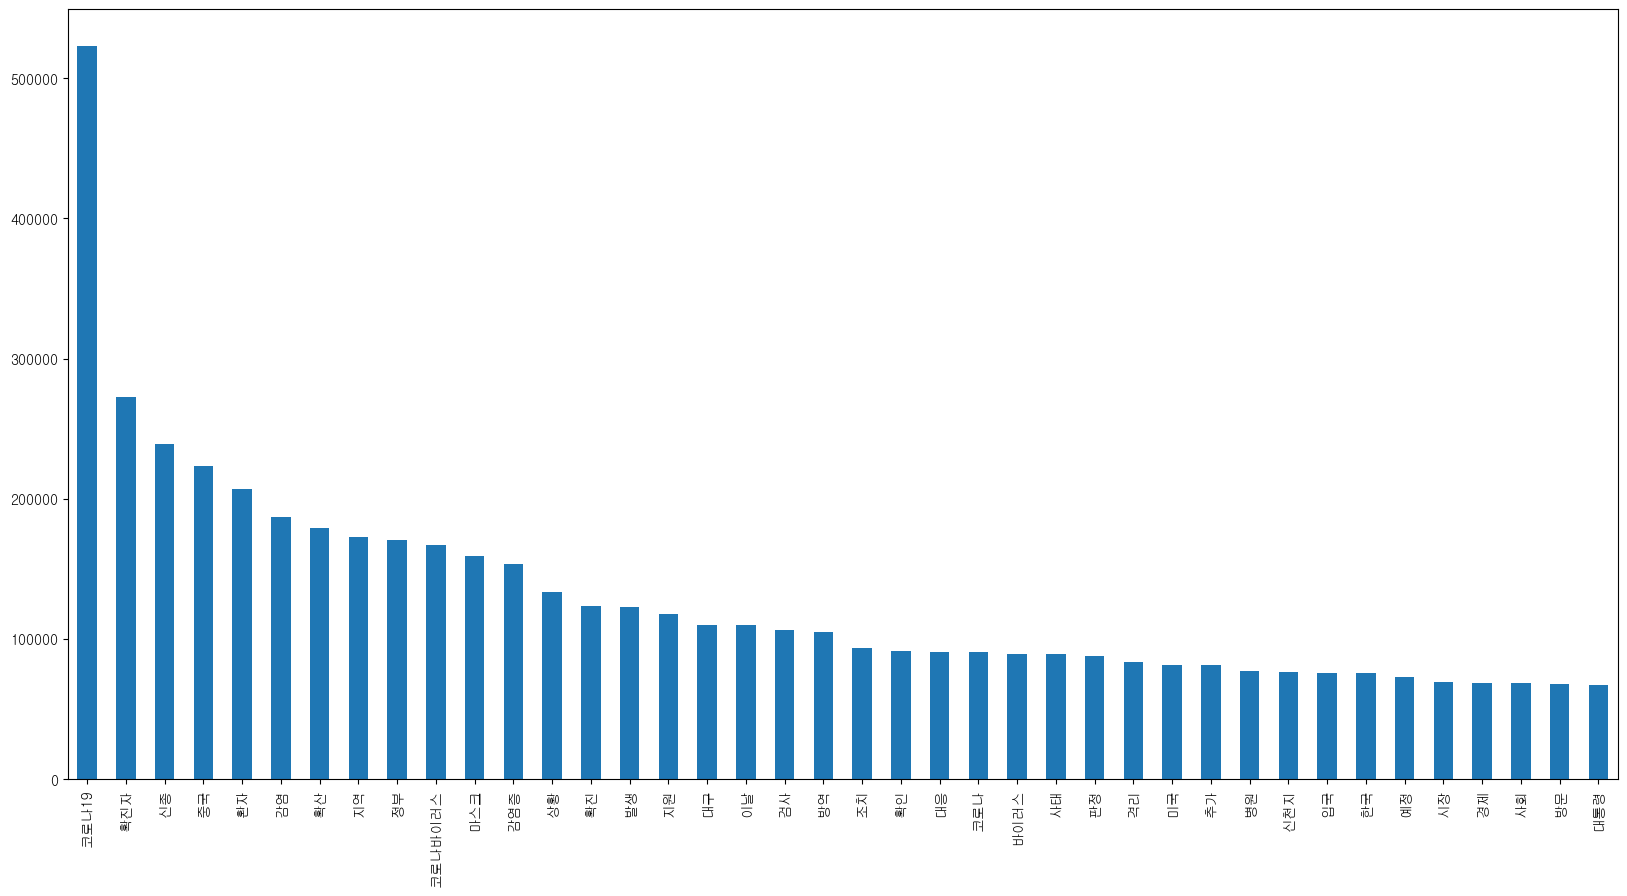

In [26]:
keywards_010203.stack().value_counts().head(40).plot(kind='bar', figsize=(20,10))

In [22]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [46]:
m = folium.Map([center_lat,center_lon], zoom_start = 11,  tiles='cartodbpositron')

In [47]:
folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

In [48]:
m

In [27]:
from folium import Marker, Icon

In [28]:
region = df['지역'].value_counts()
region

관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     202
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
한국        1
Name: 지역, dtype: int64

In [37]:
r = region.keys()
for i in r:
    print(i)

관악구
송파구
성북구
타시도
노원구
강남구
강서구
은평구
동작구
도봉구
서초구
중랑구
영등포구
강동구
구로구
양천구
마포구
동대문구
강북구
용산구
광진구
서대문구
성동구
기타
금천구
종로구
중구
한국


In [51]:
m.choropleth(geo_data=seoul_geo,
             data = region,
            #  fill_color = 'YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 확진자 수")

In [52]:
m